<a href="https://colab.research.google.com/github/Ajay19-amp/employee-management/blob/main/ricemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

uploaded = files.upload()  # This will open a file selection dialog


Saving ezyZip.zip to ezyZip.zip


In [6]:
import zipfile
import os

zip_path = "/content/ezyZip.zip"  # Make sure this is the correct file name
extract_path = "/content/dataset"  # Folder where we extract the files

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [7]:
print("Extracted dataset contains:", os.listdir(extract_path))


Extracted dataset contains: ['Ipsala', 'Karacadag', 'Basmati', 'Arborio', 'Jasmine']


In [8]:
import os

dataset_dir = "/content/dataset"  # Make sure this is correct
print("Extracted dataset contains:", os.listdir(dataset_dir))


Extracted dataset contains: ['Ipsala', 'Karacadag', 'Basmati', 'Arborio', 'Jasmine']


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
img_height, img_width = 150, 150
batch_size = 32

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values (0-1)
    validation_split=0.2  # 80% training, 20% validation
)

# Load training images
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

# Load validation images
val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

print("✅ Images loaded successfully!")


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
✅ Images loaded successfully!


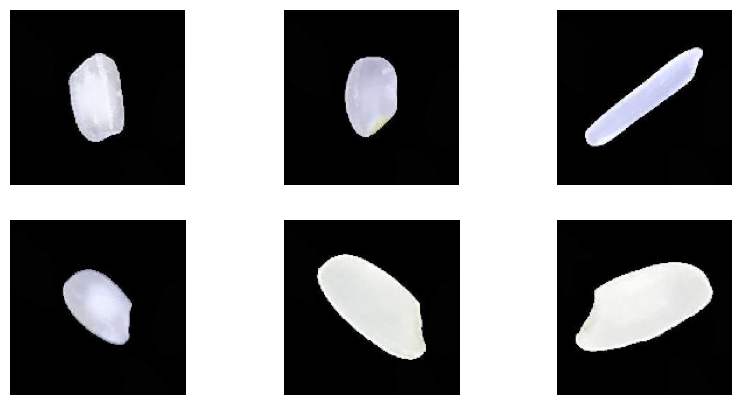

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images
images, labels = next(train_generator)

# Plot some images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


In [12]:
import tensorflow as tf

# Get the number of classes (rice varieties)
num_classes = len(train_generator.class_indices)
print(f"✅ Number of rice varieties: {num_classes}")


✅ Number of rice varieties: 5


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the CNN model
model = keras.Sequential([
    # 1st Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    # 2nd Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # 3rd Convolutional Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(128, activation='relu'),

    # Dropout Layer (prevents overfitting)
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Define number of epochs
epochs = 10

# Train the model
history = model.fit(
    train_generator,  # Training data
    validation_data=val_generator,  # Validation data
    epochs=epochs,  # Number of epochs
    verbose=1  # Show progress
)

print("✅ Model training completed!")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3107s 2s/step - accuracy: 0.9089 - loss: 0.2563 - val_accuracy: 0.9713 - val_loss: 0.0787
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2961s 2s/step - accuracy: 0.9644 - loss: 0.1082 - val_accuracy: 0.9865 - val_loss: 0.0380
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2874s 2s/step - accuracy: 0.9843 - loss: 0.0522 - val_accuracy: 0.9863 - val_loss: 0.0389
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2967s 2s/step - accuracy: 0.9887 - loss: 0.0338 - val_accuracy: 0.9946 - val_loss: 0.0170
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2852s 2s/step - accuracy: 0.9912 - loss: 0.0298 - val_accuracy: 0.9951 - val_loss: 0.0143
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2855s 2s/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9969 - val_loss: 0.0108
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2911s 2s/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9974 - val_loss: 0.0094
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2990s 2s/step - accuracy: 0.9950 - loss: 0.01

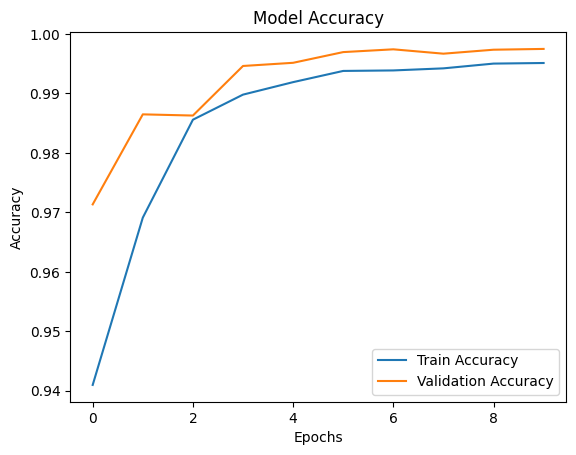

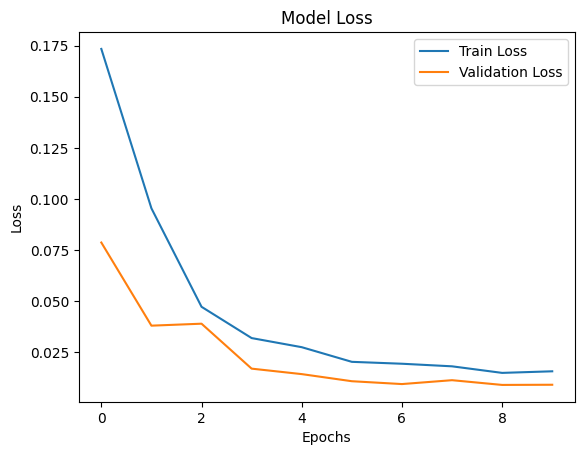

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [15]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"✅ Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"✅ Validation Loss: {val_loss:.4f}")


469/469 ━━━━━━━━━━━━━━━━━━━━ 223s 475ms/step - accuracy: 0.9972 - loss: 0.0072
✅ Validation Accuracy: 99.75%
✅ Validation Loss: 0.0091


In [19]:
import os

dataset_main_path = "/content/dataset"
print("Existing folders:", os.listdir(dataset_main_path))


Existing folders: ['Ipsala', 'Karacadag', 'Basmati', 'Arborio', 'Jasmine']


In [28]:
from google.colab import files

# Upload an image file
uploaded = files.upload()


Saving test_sample.jpg to test_sample.jpg


In [29]:
test_image_path = "/content/test_sample.jpg"  # Update with your uploaded image name


In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=(150, 150))  # Resize to match Conv2D input shape
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())  # Get class labels
predicted_class = class_labels[np.argmax(predictions)]  # Find the class with highest probability

print(f"✅ Predicted Rice Variety: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
✅ Predicted Rice Variety: Basmati


In [31]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,486,993 (55.26 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,657,996 (36.84 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


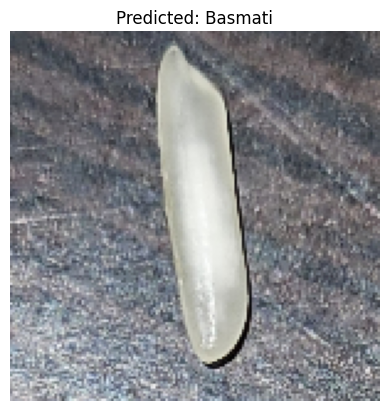

✅ Predicted Rice Variety: Basmati


In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

test_image_path = "/content/test_sample.jpg"  # Update with your image path

# Load and preprocess the test image
# Resize to match the input shape of the first Conv2D layer (150, 150, 3)
img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())  # Get class labels
predicted_class = class_labels[np.argmax(predictions)]  # Find the class with highest probability

# Display image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()

print(f"✅ Predicted Rice Variety: {predicted_class}")

In [38]:
# Save the entire model
model.save("/content/rice_classification_model.h5")

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [39]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/content/rice_classification_model.h5")

print("✅ Model loaded successfully!")


✅ Model loaded successfully!
